<a href="https://colab.research.google.com/github/sainikhila11/SaiNikhila_INFO5731_Spring2024/blob/main/Yavanamanda_Sai_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import csv
import re

def clean_text(text):
    # Remove punctuation and convert to lowercase
    cleaned_text = re.sub(r'[^\w\s]', '', text.lower())
    return cleaned_text

def generate_ngrams(text, n):
    words = text.split()
    ngrams = []
    for i in range(len(words)-n+1):
        ngram = ' '.join(words[i:i+n])
        ngrams.append(ngram)
    return ngrams

def count_ngrams(texts, n):
    ngram_counts = {}
    for text in texts:
        cleaned_text = clean_text(text)
        ngrams = generate_ngrams(cleaned_text, n)
        for ngram in ngrams:
            if ngram in ngram_counts:
                ngram_counts[ngram] += 1
            else:
                ngram_counts[ngram] = 1
    return ngram_counts

def calculate_bigram_probabilities(texts):
    bigram_probabilities = {}
    unigram_counts = count_ngrams(texts, 1)
    bigram_counts = count_ngrams(texts, 2)
    for bigram in bigram_counts:
        words = bigram.split()
        if len(words) == 2:
            w1, w2 = words
            probability = bigram_counts[bigram] / unigram_counts[w1]
            bigram_probabilities[bigram] = probability
    return bigram_probabilities

def extract_noun_phrases(text):
    # For demonstration purposes, we'll just split the text into words and return any sequence of two consecutive words
    words = text.split()
    noun_phrases = []
    for i in range(len(words)-1):
        noun_phrase = ' '.join(words[i:i+2])
        noun_phrases.append(noun_phrase)
    return noun_phrases

def calculate_relative_probabilities(texts):
    max_noun_phrase_counts = {}
    all_noun_phrases = set()
    for text in texts:
        noun_phrases = extract_noun_phrases(text)
        for phrase in noun_phrases:
            all_noun_phrases.add(phrase)
            if phrase in max_noun_phrase_counts:
                max_noun_phrase_counts[phrase] = max(max_noun_phrase_counts[phrase], noun_phrases.count(phrase))
            else:
                max_noun_phrase_counts[phrase] = noun_phrases.count(phrase)

    relative_probabilities = {}
    for text_index, text in enumerate(texts):
        relative_probabilities[text_index] = {}
        for phrase in all_noun_phrases:
            frequency = extract_noun_phrases(text).count(phrase)
            relative_probabilities[text_index][phrase] = frequency / max_noun_phrase_counts[phrase]

    return relative_probabilities

def print_table(data):
    for row_index, row_data in data.items():
        print(f"Review {row_index + 1}:", end=" ")
        for key, value in row_data.items():
            print(f"{key}: {value:.2f}", end=" | ")
        print()

def read_dataset(file_path, num_reviews=100):
    reviews = []
    with open(file_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip the header
        for i, row in enumerate(reader):
            if i < num_reviews:
                reviews.append(row[1])  # Append the review from the second column
            else:
                break
    return reviews

# Load dataset
dataset_path = '/content/cleaned_imdb_reviews.csv'
dataset = read_dataset(dataset_path)

# Task 1: Count the frequency of all the trigrams (N=3)
print("Task 1: Frequency of all the trigrams (N=3):")
trigram_counts = count_ngrams(dataset, 3)
print(trigram_counts)
print()

# Task 2: Calculate the probabilities for all the bigrams in the dataset
print("Task 2: Probabilities for all the bigrams in the dataset:")
bigram_probabilities = calculate_bigram_probabilities(dataset)
print(bigram_probabilities)
print()

# Task 3: Extract all the noun phrases and calculate the relative probabilities of each review
print("Task 3: Relative probabilities of each review in terms of other reviews:")
relative_probabilities = calculate_relative_probabilities(dataset)
print_table(relative_probabilities)


Task 1: Frequency of all the trigrams (N=3):
{'margot does the': 4, 'does the best': 4, 'the best with': 4, 'best with what': 4, 'with what shes': 4, 'what shes given': 4, 'shes given but': 4, 'given but this': 4, 'but this film': 4, 'this film was': 4, 'film was very': 4, 'was very disappointing': 4, 'very disappointing to': 4, 'disappointing to me': 4, 'to me it': 8, 'me it was': 8, 'it was marketed': 4, 'was marketed as': 4, 'marketed as a': 4, 'as a fun': 8, 'a fun quirky': 4, 'fun quirky satire': 4, 'quirky satire with': 4, 'satire with homages': 4, 'with homages to': 4, 'homages to other': 4, 'to other movies': 4, 'other movies it': 4, 'movies it started': 4, 'it started that': 4, 'started that way': 4, 'that way but': 4, 'way but ended': 4, 'but ended with': 4, 'ended with overdramatized': 4, 'with overdramatized speeches': 4, 'overdramatized speeches and': 4, 'speeches and an': 4, 'and an ending': 4, 'an ending that': 4, 'ending that clearly': 4, 'that clearly tried': 4, 'clear

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [14]:
import csv
import re
import math

def clean_text(text):
    # Remove punctuation and convert to lowercase
    cleaned_text = re.sub(r'[^\w\s]', '', text.lower())
    return cleaned_text

def calculate_tf(text):
    # Calculate term frequency for each term in the text
    words = text.split()
    word_count = len(words)
    term_freq = {}
    for word in words:
        if word in term_freq:
            term_freq[word] += 1
        else:
            term_freq[word] = 1
    for word in term_freq:
        term_freq[word] /= word_count
    return term_freq

def calculate_idf(documents):
    # Calculate inverse document frequency for each term
    total_documents = len(documents)
    term_doc_count = {}
    for document in documents:
        words = set(document.split())
        for word in words:
            if word in term_doc_count:
                term_doc_count[word] += 1
            else:
                term_doc_count[word] = 1
    idf = {}
    for term in term_doc_count:
        idf[term] = math.log(total_documents / (1 + term_doc_count[term]))
    return idf

def calculate_tf_idf(tf, idf):
    # Calculate TF-IDF for each term in the text
    tf_idf = {}
    for term, freq in tf.items():
        tf_idf[term] = freq * idf.get(term, 0)  # Use get() method with a default value of 0
    return tf_idf

def build_tf_idf_matrix(documents):
    tf_idf_matrix = []
    idf = calculate_idf(documents)
    for document in documents:
        tf = calculate_tf(document)
        tf_idf = calculate_tf_idf(tf, idf)
        tf_idf_matrix.append(tf_idf)
    return tf_idf_matrix

def dot_product(v1, v2):
    return sum(v1[term] * v2[term] for term in v1 if term in v2)

def magnitude(v):
    return math.sqrt(sum(v[term] ** 2 for term in v))

def cosine_similarity(v1, v2):
    return dot_product(v1, v2) / (magnitude(v1) * magnitude(v2))

def rank_documents(query, documents, tf_idf_matrix):
    query_tf = calculate_tf(query)
    query_vector = calculate_tf_idf(query_tf, calculate_idf(documents))
    similarity_scores = []
    for i, doc_vector in enumerate(tf_idf_matrix):
        similarity = cosine_similarity(query_vector, doc_vector)
        similarity_scores.append((i, similarity))
    similarity_scores.sort(key=lambda x: x[1], reverse=True)
    return similarity_scores

def read_dataset(file_path, num_documents):
    documents = []
    with open(file_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip the header
        for i, row in enumerate(reader):
            if i < num_documents:
                documents.append(row[1])  # Append the document from the second column
            else:
                break
    return documents

# Load dataset
dataset_path = '/content/cleaned_imdb_reviews.csv'
num_documents = 100
documents = read_dataset(dataset_path, num_documents)

# Build TF-IDF matrix
tf_idf_matrix = build_tf_idf_matrix(documents)

# Design a query
query = "An Outstanding movie with a haunting performance and best character development"
query = clean_text(query)

# Rank documents based on cosine similarity to the query
ranked_documents = rank_documents(query, documents, tf_idf_matrix)

# Print ranked documents
for i, (index, similarity) in enumerate(ranked_documents):
    print(f"Rank {i+1}: Document {index + 1}, Similarity: {similarity:.4f}")


Rank 1: Document 11, Similarity: 0.0763
Rank 2: Document 36, Similarity: 0.0763
Rank 3: Document 61, Similarity: 0.0763
Rank 4: Document 86, Similarity: 0.0763
Rank 5: Document 23, Similarity: 0.0763
Rank 6: Document 48, Similarity: 0.0763
Rank 7: Document 73, Similarity: 0.0763
Rank 8: Document 98, Similarity: 0.0763
Rank 9: Document 3, Similarity: 0.0706
Rank 10: Document 28, Similarity: 0.0706
Rank 11: Document 53, Similarity: 0.0706
Rank 12: Document 78, Similarity: 0.0706
Rank 13: Document 14, Similarity: 0.0585
Rank 14: Document 39, Similarity: 0.0585
Rank 15: Document 64, Similarity: 0.0585
Rank 16: Document 89, Similarity: 0.0585
Rank 17: Document 7, Similarity: 0.0536
Rank 18: Document 32, Similarity: 0.0536
Rank 19: Document 57, Similarity: 0.0536
Rank 20: Document 82, Similarity: 0.0536
Rank 21: Document 1, Similarity: 0.0304
Rank 22: Document 26, Similarity: 0.0304
Rank 23: Document 51, Similarity: 0.0304
Rank 24: Document 76, Similarity: 0.0304
Rank 25: Document 22, Simila

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

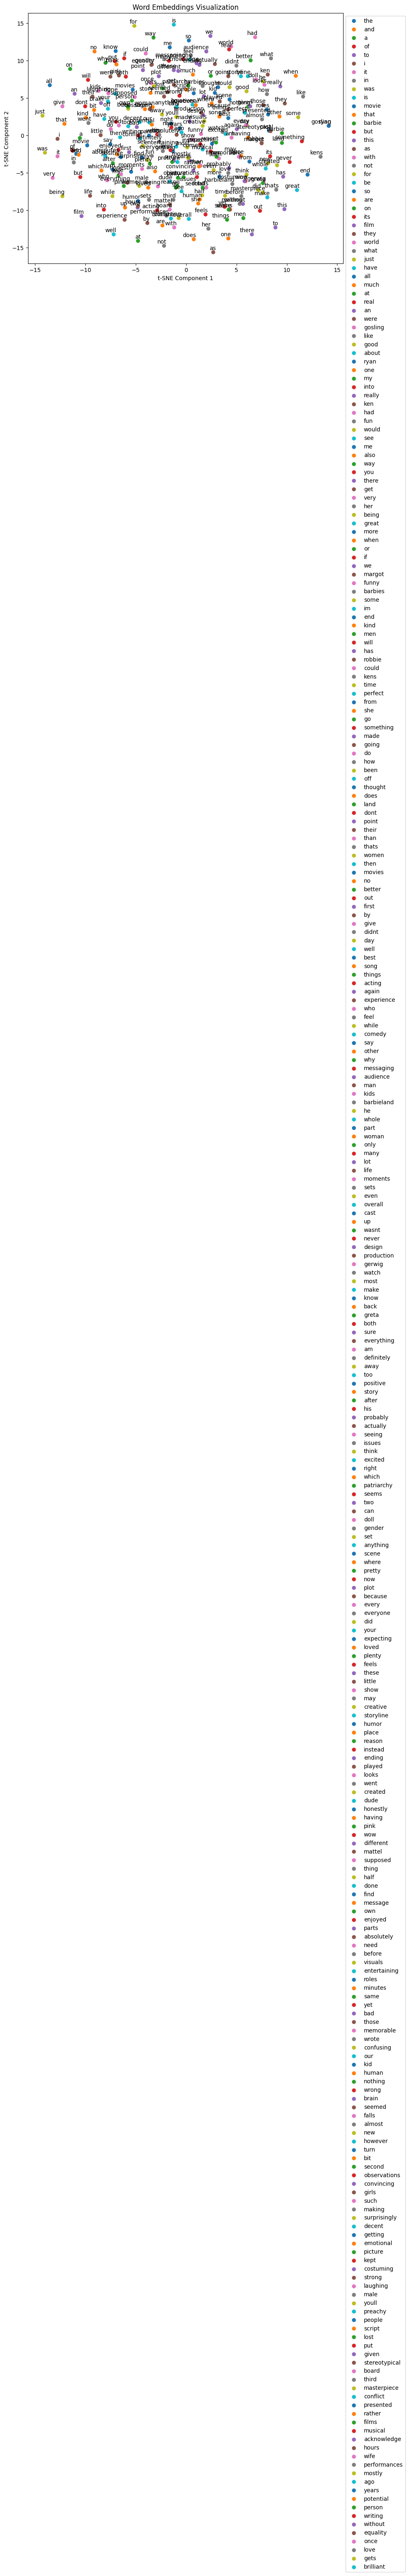

In [17]:
import csv
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Function to read the dataset from a CSV file
def read_dataset(file_path):
    documents = []
    with open(file_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip the header
        for row in reader:
            documents.append(row[1])  # Append the document from the second column
    return documents

# Load dataset
dataset_path = '/content/cleaned_imdb_reviews.csv'
documents = read_dataset(dataset_path)

# Tokenize the documents into words
tokenized_documents = [doc.split() for doc in documents]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_documents, vector_size=300, window=5, min_count=1, sg=1)

# Visualize word embeddings using t-SNE
words = list(model.wv.key_to_index.keys())[:300]  # Visualize the embeddings of the first 300 words
word_vectors = np.array([model.wv[word] for word in words])

tsne = TSNE(n_components=2, random_state=42)
word_embeddings_2d = tsne.fit_transform(word_vectors)

# Plot the embeddings
plt.figure(figsize=(10, 8))
for word, embedding in zip(words, word_embeddings_2d):
    plt.scatter(*embedding, label=word)
    plt.annotate(word, xy=embedding, xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Word Embeddings Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer